In [507]:
import pandas as pd

In [508]:
pd.set_option('display.max_columns', None)
store_records = pd.read_csv('../data/sample_superstore_updated.csv')
store_records['order_year'] = store_records['order_date'].str[-4:]
store_records.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year,order_year
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015


In [509]:
store_records['order_date'] = pd.to_datetime(store_records['order_date'])
store_records['ship_date'] = pd.to_datetime(store_records['ship_date'])

## KPI Data Points for Dashboard

In [510]:
# sales % change, year by year

sales_delta = (
    store_records.filter(['order_id', 'sales', 'year'])
    .groupby('year')
    .agg(
        {'sales':'sum',
         'order_id':'first'}
    )
    .reset_index()
    .assign(
        sales_previous_year = lambda x: x.sales.shift(1)
    )
    .assign(
        sales_delta = lambda x: (x.sales - x.sales_previous_year) / x.sales_previous_year * 100
    )
)
sales_delta

,year,sales,order_id,sales_previous_year,sales_delta
0,2014,484247.4981,CA-2014-115812,NaN,NaN
1,2015,470532.5090,US-2015-108966,484247.4981,-2.832227
2,2016,609205.5980,CA-2016-152156,470532.5090,29.471521
3,2017,733215.2552,CA-2017-114412,609205.5980,20.355962


In [511]:
# sales, are they up? # sales are up 51% in the last 4 years

sales_delta2 = (
    store_records.filter(['order_id', 'sales', 'year'])
    .loc[lambda x: x['year'].isin([2014, 2017])]
    .groupby('year')
    .agg(
        {'sales':'sum',
         'order_id':'first'}
    )
    .reset_index()
    .assign(
        sales_previous_year = lambda x: x.sales.shift(1)
    )
    .assign(
        sales_delta = lambda x: (x.sales - x.sales_previous_year) / x.sales_previous_year * 100
    )
    .assign(
        sales_delta = lambda x: x.sales_delta.round(2)
    )
)
sales_delta2

# do the same here for profits
# what is the % of profit increase, relative measurement

,year,sales,order_id,sales_previous_year,sales_delta
0,2014,484247.4981,CA-2014-115812,NaN,NaN
1,2017,733215.2552,CA-2017-114412,484247.4981,51.41


In [512]:
sales_2017 = int(sales_delta['sales'].iloc[3])
sales_2016 = int(sales_delta['sales'].iloc[2])
sales_2014 = int(sales_delta['sales'].iloc[0])

sales_pct_change = (sales_2017 - sales_2014)/sales_2014 * 100
sales_pct_change = round(sales_pct_change, 2)
sales_pct_change

51.41

In [513]:
# sales are up 20% in last year, from 2016 to 2017
sales_pct_change_recent = (sales_2017 - sales_2016)/sales_2016 * 100
sales_pct_change_recent = round(sales_pct_change_recent, 2)
sales_pct_change_recent

20.36

In [514]:
# profits, are they up? # profits are up 88% in the last 4 years
profit_delta = store_records[['order_id','profit','year']].groupby('year').agg({'profit':'sum','order_id':'first'}).reset_index()
profit_delta

,year,profit,order_id
0,2014,49543.9741,CA-2014-115812
1,2015,61618.6037,US-2015-108966
2,2016,81795.1743,CA-2016-152156
3,2017,93439.2696,CA-2017-114412


In [515]:
profits_2017 = int(profit_delta['profit'].iloc[3])
profits_2016 = int(profit_delta['profit'].iloc[2])
profits_2014 = int(profit_delta['profit'].iloc[0])

profit_pct_change = (profits_2017 - profits_2014)/profits_2014 * 100
profit_pct_change

88.60182064065559

In [516]:
# profits are up 14% in last year, from 2016 to 2017
profit_pct_change_recent = (profits_2017 - profits_2016)/profits_2016 * 100
profit_pct_change_recent = round(profit_pct_change_recent, 2)
profit_pct_change_recent

14.24

In [517]:
# sales % change, year by year

profit_delta = (
    store_records.filter(['order_id', 'profit', 'year'])
    .groupby('year')
    .agg(
        {'profit':'sum',
         'order_id':'first'}
    )
    .reset_index()
    .assign(
        profit_previous_year = lambda x: x.profit.shift(1)
    )
    .assign(
        profit_delta = lambda x: (x.profit - x.profit_previous_year) / x.profit_previous_year * 100
    )
    .assign(
        profit_delta = lambda x: x.profit_delta.round(2)
    )
)
profit_delta

,year,profit,order_id,profit_previous_year,profit_delta
0,2014,49543.9741,CA-2014-115812,NaN,NaN
1,2015,61618.6037,US-2015-108966,49543.9741,24.37
2,2016,81795.1743,CA-2016-152156,61618.6037,32.74
3,2017,93439.2696,CA-2017-114412,81795.1743,14.24


In [518]:
# year/year sales trend

sales_delta

,year,sales,order_id,sales_previous_year,sales_delta
0,2014,484247.4981,CA-2014-115812,NaN,NaN
1,2015,470532.5090,US-2015-108966,484247.4981,-2.832227
2,2016,609205.5980,CA-2016-152156,470532.5090,29.471521
3,2017,733215.2552,CA-2017-114412,609205.5980,20.355962


In [519]:
# total sales
total_sales = int(store_records['sales'].sum())
total_items_sold = int(store_records['quantity'].sum())
print(f"Total sales: ${total_sales}.")
print(f"Total quantity: {total_items_sold}.")

Total sales: $2297200.
Total quantity: 37873.


In [520]:
# category of most sold products (rank top 3)
# there are only 3 main categories, but this is where each ranks

top_3_category = store_records[['product_id', 'quantity', 'product_name','category','sub_category']].groupby('category').agg({'product_id':'count','quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='quantity', ascending=False).reset_index()
top_3_category

,category,product_id_count,quantity
0,Office Supplies,6026,22906
1,Furniture,2121,8028
2,Technology,1847,6939


In [521]:
# category of most sold products (rank top 5)

top_5_sub_category = store_records[['product_id', 'quantity', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='quantity', ascending=False).reset_index()
top_5_sub_category = top_5_sub_category.iloc[0:5]
top_5_sub_category

,sub_category,product_id_count,quantity
0,Binders,1523,5974
1,Paper,1370,5178
2,Furnishings,957,3563
3,Phones,889,3289
4,Storage,846,3158


In [522]:
# category that generated most profits (rank top 5)

top_5_sub_category = store_records[['product_id', 'profit', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_5_sub_category = top_5_sub_category.iloc[0:5]
top_5_sub_category

,sub_category,product_id_count,profit
0,Copiers,68,55617.8249
1,Phones,889,44515.7306
2,Accessories,775,41936.6357
3,Paper,1370,34053.5693
4,Binders,1523,30221.7633


In [523]:
# top 5 list of products that generate the most profit

high_profit_products = store_records[['product_id', 'product_name','category','sub_category','profit']].groupby('product_id').agg({'profit':'sum', 'product_name':'first', 'category':'first', 'sub_category':'first'}).sort_values(by='profit', ascending=False).reset_index()
high_profit_products_top_5 = high_profit_products.iloc[0:5]
high_profit_products_top_5

,product_id,profit,product_name,category,sub_category
0,TEC-CO-10004722,25199.9280,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers
1,OFF-BI-10003527,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,Binders
2,TEC-CO-10001449,6983.8836,Hewlett Packard LaserJet 3310 Copier,Technology,Copiers
3,TEC-CO-10003763,4570.9347,Canon PC1060 Personal Laser Copier,Technology,Copiers
4,TEC-AC-10002049,4425.3432,Logitech G19 Programmable Gaming Keyboard,Technology,Accessories


In [524]:
# top 5 list of products that generate the least profit

neg_profit_products = store_records[['product_id', 'product_name','category','sub_category','profit']].groupby('product_id').agg({'profit':'sum', 'product_name':'first', 'category':'first', 'sub_category':'first'}).sort_values(by='profit', ascending=True).reset_index()
neg_profit_products_top_5 = neg_profit_products.iloc[0:5]
neg_profit_products_top_5

,product_id,profit,product_name,category,sub_category
0,TEC-MA-10000418,-8879.9704,Cubify CubeX 3D Printer Double Head Print,Technology,Machines
1,TEC-MA-10000822,-4589.9730,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines
2,TEC-MA-10004125,-3839.9904,Cubify CubeX 3D Printer Triple Head Print,Technology,Machines
3,FUR-TA-10000198,-2876.1156,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Furniture,Tables
4,FUR-TA-10001889,-1934.3976,Bush Advantage Collection Racetrack Conference...,Furniture,Tables


In [525]:
# top 3 category % change by year
# USE THIS

top_3_category_a = store_records[['product_id', 'product_name','category','sub_category','profit','year']].groupby(['category','year']).agg({'product_id':'count','profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_a = top_3_category_a[top_3_category_a['year'].isin([2016, 2017])]
top_3_category_a = top_3_category_a.pivot(index='category', columns='year', values='profit').reset_index()
top_3_category_a['pct_change'] = (top_3_category_a[2017] - top_3_category_a[2016]) / top_3_category_a[2016] * 100
top_3_category_a['pct_change'] = top_3_category_a['pct_change'].round(2)
top_3_category_a = top_3_category_a.sort_values(by='pct_change', ascending=False)
top_3_category_a

year,category,2016,2017,pct_change
2,Technology,39773.9920,50684.2566,27.43
1,Office Supplies,35061.2292,39736.6217,13.33
0,Furniture,6959.9531,3018.3913,-56.63


In [526]:
top_3_category_a = store_records[['product_id', 'product_name','category','sub_category','profit','year']].groupby(['category','year']).agg({'product_id':'count','profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_a = top_3_category_a[top_3_category_a['year'].isin([2014, 2017])]
top_3_category_a = top_3_category_a.pivot(index='category', columns='year', values='profit').reset_index()
top_3_category_a['pct_change'] = (top_3_category_a[2017] - top_3_category_a[2014]) / top_3_category_a[2014] * 100
top_3_category_a['pct_change'] = top_3_category_a['pct_change'].round(2)
top_3_category_a = top_3_category_a.sort_values(by='pct_change', ascending=False)
top_3_category_a

year,category,2014,2017,pct_change
2,Technology,21492.8325,50684.2566,135.82
1,Office Supplies,22593.4161,39736.6217,75.88
0,Furniture,5457.7255,3018.3913,-44.70


In [527]:
# top 5 category % change by year
# USE THIS
# Needs Rename

top_3_category_b = store_records[['product_id', 'product_name','sub_category','profit','year']].groupby(['sub_category','year']).agg({'product_id':'count','profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_b = top_3_category_b[top_3_category_b['year'].isin([2016, 2017])]
top_3_category_b = top_3_category_b.pivot(index='sub_category', columns='year', values='profit').reset_index()
top_3_category_b['pct_change'] = (top_3_category_b[2017] - top_3_category_b[2016]) / top_3_category_b[2016] * 100
top_3_category_b['pct_change'] = top_3_category_b['pct_change'].round(2)
top_3_category_b['the_diff'] = top_3_category_b[2017] - top_3_category_b[2016]
top_3_category_b['pos_neg'] = top_3_category_b['the_diff'].apply(lambda x: 'positive' if x > 0 else 'negative')
top_3_category_b = top_3_category_b.sort_values(by='pct_change', ascending=False)
top_3_category_b.head(3)

year,sub_category,2016,2017,pct_change,the_diff,pos_neg
16,Tables,-2950.9418,-8140.6947,175.87,-5189.7529,negative
0,Accessories,9664.2885,15672.3570,62.17,6008.0685,positive
2,Art,1413.9626,2221.9631,57.14,808.0005,positive


In [528]:
top_3_category_filtered = top_3_category_b[top_3_category_b['pos_neg'] == 'positive']
top_3_category_filtered = top_3_category_filtered.sort_values(by='pct_change', ascending=False)
top_3_category_filtered

year,sub_category,2016,2017,pct_change,the_diff,pos_neg
0,Accessories,9664.2885,15672.3570,62.17,6008.0685,positive
2,Art,1413.9626,2221.9631,57.14,808.0005,positive
1,Appliances,5301.3415,7865.2683,48.36,2563.9268,positive
10,Labels,1192.6119,1744.6093,46.28,551.9974,positive
6,Copiers,17742.7926,25031.7902,41.08,7288.9976,positive
13,Phones,9459.5929,12849.3250,35.83,3389.7321,positive
12,Paper,9071.5345,12040.8434,32.73,2969.3089,positive
5,Chairs,5763.1539,7643.5493,32.63,1880.3954,positive
14,Storage,6204.2868,7402.8007,19.32,1198.5139,positive
9,Furnishings,3935.2700,4099.1628,4.16,163.8928,positive


In [529]:
top_3_category_b = store_records[['product_id', 'product_name','sub_category','profit','year']].groupby(['sub_category','year']).agg({'product_id':'count','profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_b = top_3_category_b[top_3_category_b['year'].isin([2014, 2017])]
top_3_category_b = top_3_category_b.pivot(index='sub_category', columns='year', values='profit').reset_index()
top_3_category_b['pct_change'] = (top_3_category_b[2017] - top_3_category_b[2014]) / top_3_category_b[2014] * 100
top_3_category_b['pct_change'] = top_3_category_b['pct_change'].round(2)
top_3_category_b['the_diff'] = top_3_category_b[2017] - top_3_category_b[2014]
top_3_category_b['pos_neg'] = top_3_category_b['the_diff'].apply(lambda x: 'positive' if x > 0 else 'negative')
top_3_category_b = top_3_category_b.sort_values(by='pct_change', ascending=False)
top_3_category_b.head(3)

year,sub_category,2014,2017,pct_change,the_diff,pos_neg
6,Copiers,2912.9433,25031.7902,759.33,22118.8469,positive
1,Appliances,2459.4999,7865.2683,219.79,5405.7684,positive
16,Tables,-3124.0427,-8140.6947,160.58,-5016.6520,negative


In [530]:
top_3_category_filtered = top_3_category_b[top_3_category_b['pos_neg'] == 'positive']
top_3_category_filtered = top_3_category_filtered.sort_values(by='pct_change', ascending=False)
top_3_category_filtered

year,sub_category,2014,2017,pct_change,the_diff,pos_neg
6,Copiers,2912.9433,25031.7902,759.33,22118.8469,positive
1,Appliances,2459.4999,7865.2683,219.79,5405.7684,positive
0,Accessories,6402.7150,15672.3570,144.78,9269.6420,positive
9,Furnishings,1972.8919,4099.1628,107.77,2126.2709,positive
12,Paper,6371.0214,12040.8434,88.99,5669.8220,positive
14,Storage,4166.2788,7402.8007,77.68,3236.5219,positive
8,Fasteners,178.5583,304.9489,70.78,126.3906,positive
3,Binders,4739.7160,7669.7418,61.82,2930.0258,positive
2,Art,1406.8031,2221.9631,57.94,815.1600,positive
10,Labels,1286.0042,1744.6093,35.66,458.6051,positive


In [531]:
# top 3 segment % change profits in past year
# USE THIS
# Needs Rename

top_3_segment = store_records[['product_id', 'product_name','segment','profit','year']].groupby(['segment','year']).agg({'product_id':'count','profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_segment = top_3_segment[top_3_segment['year'].isin([2016, 2017])]
top_3_segment = top_3_segment.pivot(index='segment', columns='year', values='profit').reset_index()
top_3_segment['pct_change'] = (top_3_segment[2017] - top_3_segment[2016]) / top_3_segment[2016] * 100
top_3_segment['pct_change'] = top_3_segment['pct_change'].round(2)
top_3_segment = top_3_segment.sort_values(by='pct_change', ascending=False)
top_3_segment

year,segment,2016,2017,pct_change
2,Home Office,15029.0521,21088.6672,40.32
0,Consumer,35770.9532,45568.2391,27.39
1,Corporate,30995.1690,26782.3633,-13.59


In [532]:
# states that place the most orders

high_business_states = store_records[['order_id','quantity','state','region']].groupby('state').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:5]
high_business_states

,state,order_id
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [533]:
# regions that place the most orders

high_business_states = store_records[['order_id','state','region']].groupby('region').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:4]
high_business_states

,region,order_id
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


In [534]:
# popular orders by region

popular_by_region = store_records[['order_id','quantity','category','sub_category','region']].groupby(['region','category']).agg({'order_id':'count', 'quantity':'sum'}).sort_values(by='order_id', ascending=False).reset_index()
popular_by_region = popular_by_region.rename(columns={'order_id':'order_id_count'})
popular_by_region = popular_by_region.iloc[0:5]
popular_by_region

,region,category,order_id_count,quantity
0,West,Office Supplies,1897,7235
1,East,Office Supplies,1712,6462
2,Central,Office Supplies,1422,5409
3,South,Office Supplies,995,3800
4,West,Furniture,707,2696


In [535]:
# states that buy the most different kinds of products

high_business_states = store_records[['product_id','quantity','state','region']].groupby('state').agg({'product_id':'count'}).sort_values(by='product_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:5]
high_business_states

,state,product_id
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [536]:
# regions that buy the most different kinds of products

high_business_states = store_records[['product_id','state','region']].groupby('region').agg({'product_id':'count'}).sort_values(by='product_id', ascending=False).reset_index()
high_business_states = high_business_states.iloc[0:4]
high_business_states

,region,product_id
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


In [537]:
# states that purchase the most products 

high_business_states_q = store_records[['product_id','quantity','state','region']].groupby('state').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
high_business_states_q = high_business_states_q.iloc[0:5]
high_business_states_q

,state,quantity
0,California,7667
1,New York,4224
2,Texas,3724
3,Pennsylvania,2153
4,Washington,1883


In [538]:
# regions that purchase the most products 

high_business_states = store_records[['product_id','quantity','state','region']].groupby('region').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False).reset_index()
high_business_states = high_business_states.rename(columns={'product_id':'product_id_count'})
high_business_states = high_business_states.iloc[0:4]
high_business_states

,region,quantity
0,West,12266
1,East,10618
2,Central,8780
3,South,6209


In [539]:
# top 8 overall popular products

popular_products = store_records[['product_id','quantity','state','product_name']].groupby(['product_id']).agg({'quantity':'sum', 'product_name':'first'}).sort_values(by='quantity', ascending=False).reset_index()
popular_products = popular_products.iloc[0:8]
popular_products

,product_id,quantity,product_name
0,TEC-AC-10003832,75,Logitech P710e Mobile Speakerphone
1,OFF-PA-10001970,70,Xerox 1881
2,OFF-BI-10001524,67,GBC Premium Transparent Covers with Diagonal L...
3,FUR-CH-10002647,64,"Situations Contoured Folding Chairs, 4/Set"
4,OFF-BI-10002026,64,Avery Arch Ring Binders
5,FUR-TA-10001095,61,Chromcraft Round Conference Tables
6,TEC-AC-10002049,60,Logitech G19 Programmable Gaming Keyboard
7,OFF-BI-10004728,59,Wilson Jones Turn Tabs Binder Tool for Ring Bi...


In [540]:
# popular products by region

popular_products_region = store_records[['product_id','quantity','state','region','product_name']].groupby(['product_id','region']).agg({'quantity':'sum', 'product_name':'first'}).sort_values(by='quantity', ascending=False).reset_index()
popular_products_region

,product_id,region,quantity,product_name
0,TEC-AC-10003832,West,45,Logitech P710e Mobile Speakerphone
1,OFF-BI-10000301,Central,34,GBC Instant Report Kit
2,OFF-BI-10000756,Central,33,Storex DuraTech Recycled Plastic Frosted Binders
3,OFF-PA-10001970,East,33,Xerox 1881
4,OFF-BI-10003656,East,32,Fellowes PB200 Plastic Comb Binding Machine
...,...,...,...,...
5293,OFF-PA-10000048,West,1,Xerox 20
5294,OFF-BI-10000309,West,1,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi..."
5295,OFF-BI-10000315,Central,1,Poly Designer Cover & Back
5296,OFF-BI-10004738,West,1,Flexible Leather- Look Classic Collection Ring...


In [541]:
# popular products in the west
popular_products_region[popular_products_region['region'] == 'West'].head(5)

,product_id,region,quantity,product_name
0,TEC-AC-10003832,West,45,Logitech P710e Mobile Speakerphone
5,OFF-BI-10000174,West,32,Wilson Jones Clip & Carry Folder Binder Tool f...
8,OFF-BI-10001036,West,31,Cardinal EasyOpen D-Ring Binders
13,OFF-BI-10001670,West,29,Vinyl Sectional Post Binders
14,OFF-ST-10002486,West,29,Eldon Shelf Savers Cubes and Bins


In [542]:
# profits by shipping type

high_profit_shipping = store_records[['product_id','ship_mode','profit']].groupby('ship_mode').agg({'profit':'sum', 'product_id':'count'}).sort_values(by='profit', ascending=False).reset_index()
high_profit_shipping = high_profit_shipping.rename(columns={'product_id':'order_count'})
high_profit_shipping

,ship_mode,profit,order_count
0,Standard Class,164088.7875,5968
1,Second Class,57446.6354,1945
2,First Class,48969.8399,1538
3,Same Day,15891.7589,543


In [543]:
# high profit products  (rank top 5, sub-category)

top_5_sub_category_profit = store_records[['product_id', 'profit', 'product_name','category','sub_category']].groupby('sub_category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_5_sub_category_profit = top_5_sub_category_profit.iloc[0:5]
top_5_sub_category_profit

,sub_category,product_id_count,profit
0,Copiers,68,55617.8249
1,Phones,889,44515.7306
2,Accessories,775,41936.6357
3,Paper,1370,34053.5693
4,Binders,1523,30221.7633


In [544]:
# high profit products  (rank top 3, category)

top_3_category_profit = store_records[['product_id', 'profit', 'product_name','category']].groupby('category').agg({'product_id':'count', 'profit':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_3_category_profit = top_3_category_profit.iloc[0:5]
top_3_category_profit

,category,product_id_count,profit
0,Technology,1847,145454.9481
1,Office Supplies,6026,122490.8008
2,Furniture,2121,18451.2728


In [545]:
# top 10 products by overall profit

top_10_sub_category_profit = store_records[['product_id', 'profit', 'product_name','category']].groupby('product_id').agg({'product_id':'count', 'profit':'sum', 'product_name':'first', 'category':'first'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_10_sub_category_profit = top_10_sub_category_profit.iloc[0:10]
top_10_sub_category_profit

,product_id,product_id_count,profit,product_name,category
0,TEC-CO-10004722,5,25199.9280,Canon imageCLASS 2200 Advanced Copier,Technology
1,OFF-BI-10003527,10,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies
2,TEC-CO-10001449,8,6983.8836,Hewlett Packard LaserJet 3310 Copier,Technology
3,TEC-CO-10003763,4,4570.9347,Canon PC1060 Personal Laser Copier,Technology
4,TEC-AC-10002049,15,4425.3432,Logitech G19 Programmable Gaming Keyboard,Technology
5,TEC-MA-10001127,3,4094.9766,HP Designjet T520 Inkjet Large Format Printer ...,Technology
6,TEC-MA-10003979,2,3772.9461,Ativa V4110MDD Micro-Cut Shredder,Technology
7,TEC-MA-10001047,2,3717.9714,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology
8,OFF-BI-10001120,3,3345.2823,Ibico EPK-21 Electric Binding System,Office Supplies
9,TEC-MA-10000045,2,3343.5360,Zebra ZM400 Thermal Label Printer,Technology


In [546]:
# top 10 products by profit per unit

top_10_sub_category_profit2 = store_records[['product_id', 'profit', 'product_name','category','quantity']].groupby('product_id').agg({'product_id':'count', 'profit':'sum', 'product_name':'first', 'category':'first', 'quantity':'sum'}).rename(columns={'product_id':'product_id_count'}).sort_values(by='profit', ascending=False).reset_index()
top_10_sub_category_profit2 = top_10_sub_category_profit2.iloc[0:10]
top_10_sub_category_profit2['per_unit_profit'] = (top_10_sub_category_profit2['profit'] / top_10_sub_category_profit2['quantity'])
top_10_sub_category_profit2['per_unit_profit'] = top_10_sub_category_profit2['per_unit_profit'].round(2)
top_10_sub_category_profit2 = top_10_sub_category_profit2.drop(columns=['product_id_count','product_id'])
top_10_sub_category_profit2.sort_values(by='per_unit_profit', ascending=False)

,profit,product_name,category,quantity,per_unit_profit
0,25199.9280,Canon imageCLASS 2200 Advanced Copier,Technology,20,1260.00
9,3343.5360,Zebra ZM400 Thermal Label Printer,Technology,6,557.26
6,3772.9461,Ativa V4110MDD Micro-Cut Shredder,Technology,11,343.00
5,4094.9766,HP Designjet T520 Inkjet Large Format Printer ...,Technology,12,341.25
7,3717.9714,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,11,338.00
8,3345.2823,Ibico EPK-21 Electric Binding System,Office Supplies,13,257.33
1,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,31,250.10
3,4570.9347,Canon PC1060 Personal Laser Copier,Technology,19,240.58
2,6983.8836,Hewlett Packard LaserJet 3310 Copier,Technology,38,183.79
4,4425.3432,Logitech G19 Programmable Gaming Keyboard,Technology,60,73.76


In [547]:
# gross rate of revenue per item or gross rate for sales quantity

gross_rate_per_unit = int(store_records['sales'].sum() / store_records['quantity'].sum())
gross_rate_per_unit

60

In [548]:
store_records['customer_id'].nunique()

793

In [549]:
# retention rate - ie, how many of those customers have come back
# we have about 300 repeat customers that purchase every year out of 793 unique customers

retention_rate = store_records[['customer_id','year','product_id']].groupby(['year','customer_id']).agg('count').reset_index()
retention_rate_pv = pd.pivot(retention_rate, index='customer_id', columns='year', values='product_id').reset_index()
retention_rate_pv2 = retention_rate_pv.dropna(axis=0)
retention_rate_pv2

year,customer_id,2014,2015,2016,2017
0,AA-10315,4.0,1.0,4.0,2.0
1,AA-10375,2.0,4.0,4.0,5.0
3,AA-10645,6.0,3.0,8.0,1.0
6,AB-10105,2.0,6.0,3.0,9.0
7,AB-10150,5.0,1.0,1.0,5.0
...,...,...,...,...,...
786,VW-21775,3.0,7.0,3.0,5.0
787,WB-21850,8.0,6.0,16.0,7.0
788,XP-21865,10.0,3.0,9.0,6.0
789,YC-21895,3.0,1.0,3.0,1.0


In [550]:
# and 772 repeat customers who have purchased from the store more than once

retention_rate_pv = retention_rate_pv.fillna(0)
retention_rate_pv['single_purchase_customer'] = retention_rate_pv[retention_rate_pv == 0].count(axis=1).gt(2)
repeat_customers = retention_rate_pv[retention_rate_pv['single_purchase_customer'] == False]

In [551]:
len(repeat_customers)

772

In [552]:
repeat_customers_ls = list(repeat_customers['customer_id'].unique())

In [553]:
# what % of purchases are repeated (customerID)
## make sure I didn't count unique orders without grouping
df_repeat_customers = store_records[store_records['customer_id'].isin(repeat_customers_ls)]
df_repeat_customers = df_repeat_customers[['order_id','customer_id', 'product_id']]
df_repeat_customers = df_repeat_customers.groupby(['customer_id', 'order_id']).agg('count').reset_index()

# after grouping, we have to subtract number of unique customers from unique orders
# unique orders is counting all orders
# for the purposes of calculating % of repeat orders, we can't count the first order
# hence, deleting one order for each customer or the number of unique customers removed from total unique orders
number_of_repeat_orders = len(df_repeat_customers['order_id'].unique()) - len(df_repeat_customers['customer_id'].unique())
number_of_unique_customers = len(df_repeat_customers['customer_id'].unique())
pct_repeated_orders = (number_of_repeat_orders - number_of_unique_customers) / store_records['order_id'].nunique()
pct_repeated_orders = round(pct_repeated_orders, 2) * 100
pct_repeated_orders

68.0

In [554]:
# repeat customer orders & the products they buy
# not an analysis of the quantity of products, but the number of orders of each product

df_repeat_customer_products = store_records[store_records['customer_id'].isin(repeat_customers_ls)]
df_repeat_customer_products = df_repeat_customer_products[['customer_id', 'product_id','product_name','profit','quantity']]
df_repeat_customer_products = df_repeat_customer_products.groupby(['product_id']).agg({'product_name':'first','profit':'sum', 'quantity':'sum'}).reset_index()
df_repeat_customer_products = df_repeat_customer_products.sort_values(by='quantity', ascending=False)
df_repeat_customer_products

,product_id,product_name,profit,quantity
1143,OFF-PA-10001970,Xerox 1881,1006.4352,70
1568,TEC-AC-10003832,Logitech P710e Mobile Speakerphone,1898.8056,66
721,OFF-BI-10002026,Avery Arch Ring Binders,349.6332,64
93,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",234.2340,64
694,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,20.1408,62
...,...,...,...,...
86,FUR-CH-10002317,Global Enterprise Series Seating Low-Back Swiv...,25.8980,1
1015,OFF-PA-10000048,Xerox 20,3.1104,1
17,FUR-BO-10002206,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",-12.6882,1
558,OFF-AR-10002704,Boston 1900 Electric Pencil Sharpener,4.4940,1


In [555]:
# which repeat products bring the highest profit

df_repeat_customer_products_high_profit = df_repeat_customer_products.sort_values(by='profit', ascending=False)
df_repeat_customer_products_high_profit.iloc[0:8]

,product_id,product_name,profit,quantity
1613,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,25199.9280,20
776,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390,31
1603,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6983.8836,38
1610,TEC-CO-10003763,Canon PC1060 Personal Laser Copier,4570.9347,19
1516,TEC-AC-10002049,Logitech G19 Programmable Gaming Keyboard,4425.3432,60
1630,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766,12
1664,TEC-MA-10003979,Ativa V4110MDD Micro-Cut Shredder,3772.9461,11
1629,TEC-MA-10001047,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714,11


In [556]:
# what is the general ship date after order date

ordered_n_shipped = store_records[['order_id','ship_mode','order_date','ship_date','profit']]
ordered_n_shipped['days_elapsed'] = ordered_n_shipped['ship_date'] - ordered_n_shipped['order_date']
ordered_n_shipped

/var/folders/3h/50n4kn1j38sgxpkw5gcg526c0000gn/T/ipykernel_92948/73655690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_n_shipped['days_elapsed'] = ordered_n_shipped['ship_date'] - ordered_n_shipped['order_date']


,order_id,ship_mode,order_date,ship_date,profit,days_elapsed
0,CA-2016-152156,Second Class,2016-11-08,2016-11-11,41.9136,3 days
1,CA-2016-152156,Second Class,2016-11-08,2016-11-11,219.5820,3 days
2,CA-2016-138688,Second Class,2016-06-12,2016-06-16,6.8714,4 days
3,US-2015-108966,Standard Class,2015-10-11,2015-10-18,-383.0310,7 days
4,US-2015-108966,Standard Class,2015-10-11,2015-10-18,2.5164,7 days
...,...,...,...,...,...,...
9989,CA-2014-110422,Second Class,2014-01-21,2014-01-23,4.1028,2 days
9990,CA-2017-121258,Standard Class,2017-02-26,2017-03-03,15.6332,5 days
9991,CA-2017-121258,Standard Class,2017-02-26,2017-03-03,19.3932,5 days
9992,CA-2017-121258,Standard Class,2017-02-26,2017-03-03,13.3200,5 days


In [557]:
# average days to ship

avg_ship_days = ordered_n_shipped['days_elapsed'].dt.days.mean().round(1)
int(avg_ship_days)

4

In [558]:
# profit per ship mode

ship_mode_profits = ordered_n_shipped.groupby(['ship_mode']).agg({'profit':'sum','order_id':'nunique'}).reset_index()
ship_mode_profits['profits_per_order'] = ship_mode_profits['profit'] / ship_mode_profits['order_id']
ship_mode_profits.sort_values(by='profits_per_order', ascending=False)

,ship_mode,profit,order_id,profits_per_order
0,First Class,48969.8399,787,62.223431
1,Same Day,15891.7589,264,60.196056
2,Second Class,57446.6354,964,59.591945
3,Standard Class,164088.7875,2994,54.805874


In [559]:
# create a year/year table of profitable product, to be fed into chart
# ask Cheng about how to approach this

profit_over_years = store_records[['product_id','year','profit']].groupby(['product_id','year']).agg({'profit':'sum'}).reset_index()
profit_over_years = profit_over_years.fillna(0)
profit_over_years.sort_values(by='profit', ascending=False)

,product_id,year,profit
4763,TEC-CO-10004722,2017,15679.9552
4762,TEC-CO-10004722,2016,9519.9728
2331,OFF-BI-10003527,2015,7498.8410
2011,OFF-BI-10001120,2014,4630.4755
4735,TEC-CO-10001449,2017,3623.9396
...,...,...,...
2558,OFF-BI-10004995,2014,-2640.3206
4780,TEC-MA-10000822,2017,-2719.9840
2013,OFF-BI-10001120,2017,-2929.4845
4845,TEC-MA-10004125,2017,-3839.9904


In [560]:
# consistently profitable products over the years

quantile_90 = profit_over_years['profit'].quantile(.9)
profit_over_years['percentile'] = quantile_90
profit_over_years_90th_quantile = profit_over_years[profit_over_years['profit'] > quantile_90]
profit_over_years_90th_quantile

,product_id,year,profit,percentile
4,FUR-BO-10000362,2014,341.9600,165.99765
11,FUR-BO-10000711,2014,229.9752,165.99765
33,FUR-BO-10001811,2016,316.0290,165.99765
52,FUR-BO-10002545,2016,678.5480,165.99765
53,FUR-BO-10002545,2017,203.5644,165.99765
...,...,...,...,...
5316,TEC-PH-10004539,2014,561.3003,165.99765
5320,TEC-PH-10004586,2015,539.9250,165.99765
5322,TEC-PH-10004586,2017,431.9400,165.99765
5364,TEC-PH-10004977,2014,184.2306,165.99765


In [561]:
quantile_90_products = profit_over_years_90th_quantile['product_id'].value_counts().loc[lambda x: x > 3].to_frame().reset_index()
df_to_merge = store_records[['product_id','product_name','profit']]
quantile_90_products = quantile_90_products.merge(df_to_merge, on='product_id', how='left')
quantile_90_products_gp = quantile_90_products.groupby('product_id').agg({'product_name':'first','profit':'sum'}).reset_index()
quantile_90_products_gp = quantile_90_products_gp.sort_values(by='profit', ascending=False)
quantile_90_products_gp

,product_id,product_name,profit
6,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6983.8836
5,TEC-AC-10002049,Logitech G19 Programmable Gaming Keyboard,4425.3432
7,TEC-CO-10004115,Sharp AL-1530CS Digital Copier,2064.9587
2,OFF-ST-10001490,"Hot File 7-Pocket, Floor Stand",2016.7110
4,OFF-ST-10002615,"Dual Level, Single-Width Filing Carts",1640.5348
1,OFF-LA-10003930,"Dot Matrix Printer Tape Reel Labels, White, 50...",1517.9064
3,OFF-ST-10001496,Standard Rollaway File with Lock,1261.3300
0,FUR-CH-10004287,SAFCO Arco Folding Chair,1179.3740


In [562]:
quantile_90_products_gp_ls = list(quantile_90_products_gp['product_id'].unique())
quantile_90_yearly = store_records[store_records['product_id'].isin(quantile_90_products_gp_ls)]
quantile_90_yearly = quantile_90_yearly[['product_id','year','profit']].groupby(['product_id','year']).agg({'profit':'sum'}).reset_index()
quantile_90_yearly_pv = pd.pivot_table(quantile_90_yearly, index='year', columns='product_id', values='profit').reset_index()
quantile_90_yearly_pv

product_id,year,FUR-CH-10004287,OFF-LA-10003930,OFF-ST-10001490,OFF-ST-10001496,OFF-ST-10002615,TEC-AC-10002049,TEC-CO-10001449,TEC-CO-10004115
0,2014,185.054,337.2033,446.175,327.9458,443.4716,742.6320,239.9960,434.9913
1,2015,248.580,481.7190,553.257,234.2470,403.1560,1826.0346,335.9944,1014.9797
2,2016,218.198,228.0792,749.574,410.8332,403.1560,363.3192,2783.9536,179.9964
3,2017,527.542,470.9049,267.705,288.3040,390.7512,1493.3574,3623.9396,434.9913


In [563]:
quantile_90_yearly_2017 = quantile_90_yearly[quantile_90_yearly['year'] == 2017]
quantile_90_yearly_2017 = quantile_90_yearly_2017.sort_values(by='profit', ascending=False)
quantile_90_yearly_2017[0:5]

,product_id,year,profit
27,TEC-CO-10001449,2017,3623.9396
23,TEC-AC-10002049,2017,1493.3574
3,FUR-CH-10004287,2017,527.5420
7,OFF-LA-10003930,2017,470.9049
31,TEC-CO-10004115,2017,434.9913


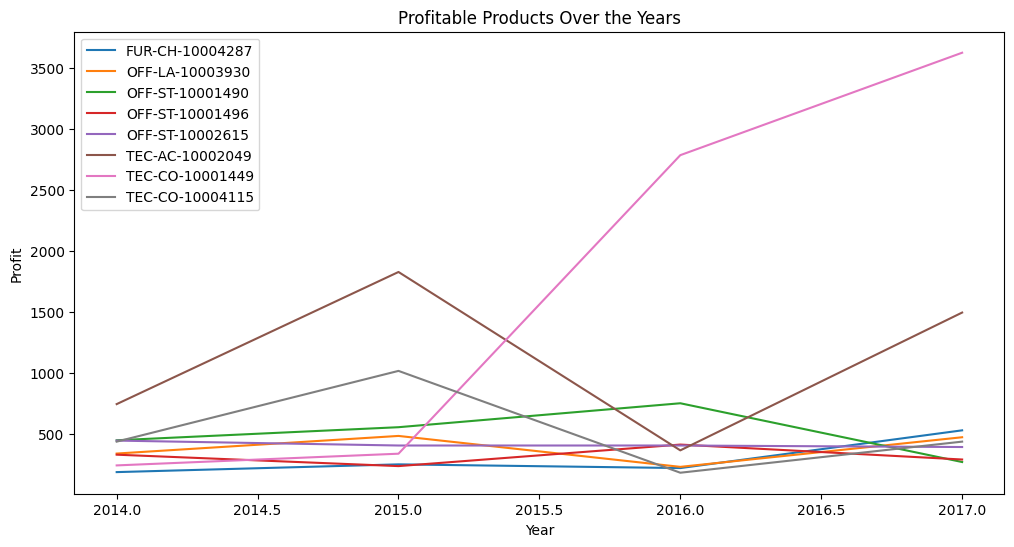

In [564]:
# consistently profitable products over the years chart

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for column in quantile_90_yearly_pv.columns[1:]:
    plt.plot(quantile_90_yearly_pv['year'], quantile_90_yearly_pv[column], label=column)
plt.title('Profitable Products Over the Years') 
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()
plt.show()

# for dashboard, use bar chart
# every year, what are the top 3-5 profitable products?
# grouped bar chart? - show % of profit on top of each bar
# when you show profit, people want to know the % 
# that green line makes viewer ask what % of total profit is that product

In [565]:
# also ask Cheng about how to approach this

discount = store_records[['product_id','product_name','sales','profit','discount','quantity','category','year']]
discount = discount[discount['year'] == 2017]
discount = discount.sort_values(by='profit', ascending=True)
discount[0:5]

# heavy discount b/c product was sitting in warehouse, so high discount to get rid of it
# if they want to get rid of it, does it matter what the profit is without discount
# another section in the dashboard to show products that are not profitable
# can show 2 factors (what is the loss of the revenue) & compare discount amount
# show top 3 products that lost revenue & amount of discount
# for some of these high discount products, quantities are low

,product_id,product_name,sales,profit,discount,quantity,category,year
683,TEC-MA-10004125,Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904,0.5,4,Technology,2017
3011,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,2549.985,-3399.9800,0.7,5,Technology,2017
4991,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,1889.990,-2929.4845,0.8,5,Office Supplies,2017
5310,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,-2287.7820,0.8,6,Office Supplies,2017
2928,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,1633.188,-1306.5504,0.7,4,Office Supplies,2017


In [566]:
# Cheng suggested:
# - once the dashboard is up, set it up for automation
# - set it up the database tables to be queried in Big Query
# - you can have a table/view for each of the queries
# - adjust the queries so that they don't have any hard-coded values and are flexible
# - set it up so that the dashboard is set to update weekly or every two weeks

# my idea:
# - create an api that generates more mock superstore data
# - set it up to pull data from the api, drop it into the databases 
# - set up the dashboard to pull from the databases
# - this may be much later down the line, when I have time

## Data To Export

In [567]:
data_dict = {
    'profit_pct_change_recent':profit_pct_change_recent, 
    'sales_pct_change_recent':sales_pct_change_recent
    }

In [568]:
data_dict_df = pd.DataFrame(data_dict, index=[0])

In [569]:
data_dict_df.to_csv('../output/pct_change_profit_sales.csv', index=False)

In [570]:
profit_delta.to_csv('../output/profit_delta.csv', index=False)

In [571]:
sales_delta.to_csv('../output/sales_delta.csv', index=False)

In [573]:
store_records['profit'].sum()

np.float64(286397.0217)

In [574]:
store_records['sales'].sum()

np.float64(2297200.8603000003)